In [88]:
%matplotlib widget
import pyslim, msprime, tskit, random, math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG, display

#load tree sequence file, recapitate/mutate if desired
#not recapitating now because that makes tree roots inaccessible individual-wise

ts = pyslim.load("/Users/alexanderwhitwam/Dropbox/university/research/space-trees/alex/habmat.trees")
#ts = ts.recapitate(recombination_rate = 1e-8, Ne=500)
#ts = pyslim.SlimTreeSequence(msprime.mutate(ts, rate=1e-7))

In [89]:
samps = random.sample(sorted(ts.individuals_alive_at(0)), 5)
snodes = []
for i in samps:
    snodes.append(ts.individuals()[i].nodes[0])
    snodes.append(ts.individuals()[i].nodes[1])
sts = ts.simplify(snodes, keep_unary = True, keep_input_roots = True)

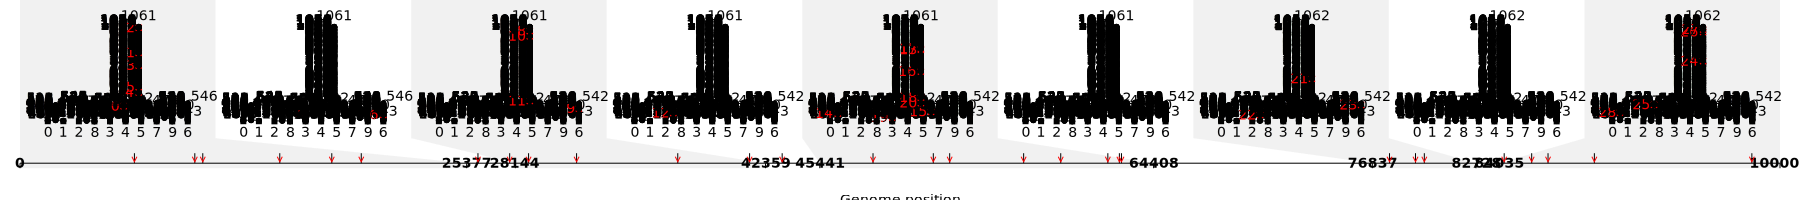

In [90]:
SVG(sts.draw_svg())

In [91]:
simpns = []
for i in range(0, 5):
    for n in sts.individual(i).nodes:
        simpns.append(n)

In [92]:
def ancestral_movement(tree):
    lists, simpis, ancestors, points, mutis = [], [], [], [], [] #lists of xyz coordinates for each individual, 
                                          #descendant & ancestral individuals in simplified ts
    xm, ym, zm = [], [], []
    for mut in tree.mutations():
        ind = sts.node(mut.node).individual
        if ind != -1:
            mutis.append(ind)
            xm.append(sts.individual(ind).location[0])
            ym.append(sts.individual(ind).location[1])
            zm.append(sts.individual(ind).time)

    for n in simpns:
        ind = sts.node(n).individual
        if ind not in simpis:
            simpis.append(ind)
        x = [sts.individual(ind).location[0]]
        y = [sts.individual(ind).location[1]]
        z = [sts.individual(ind).time]
        while tree.parent(n) != tskit.NULL and sts.node(tree.parent(n)).time < 2000:
            n = tree.parent(n)
            indi = sts.node(n).individual
            if indi != -1:
                if tree.num_children(n) > 1 or indi in mutis:
                    x.append(sts.individual(indi).location[0])
                    y.append(sts.individual(indi).location[1])
                    z.append(sts.individual(indi).time)
                    points.append(indi)
                elif tree.num_children(n) == 1:
                    points.append(indi)
                    if sts.individual(indi).time % 10 == 0 or n in tree.roots:
                        x.append(sts.individual(indi).location[0])
                        y.append(sts.individual(indi).location[1])
                        z.append(sts.individual(indi).time)
        lists.append([x, y, z])

    xan, yan, zan = [], [], []
    for n in tree.roots:
        i = sts.node(n).individual
        if i != -1:
            ancestors.append(i)
            xan.append(sts.individual(i).location[0])
            yan.append(sts.individual(i).location[1])
            zan.append(sts.individual(i).time)
                                
    xde, yde, zde = [], [], []
    for i in simpis:
        xde.append(sts.individual(i).location[0])
        yde.append(sts.individual(i).location[1])
        zde.append(sts.individual(i).time)
        
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_zlim([2000, 0])

    for i in range(len(lists)):
        ax.plot(lists[i][0], lists[i][1], lists[i][2], color="black", linewidth=0.5)

    ax.scatter3D(xan, yan, zan, color="xkcd:sky blue")
    ax.scatter3D(xde, yde, zde, color="xkcd:orange")
    ax.scatter3D(xm, ym, zm, color="green")

In [93]:
# Iterate over the trees from left-to-right
tree = tskit.Tree(sts)
while tree.next():
    if tree.num_mutations > 0:
        ancestral_movement(tree)
        print(tree)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

╔═══════════════════════════════════╗
║Tree                               ║
╠═══════════════════╤═══════════════╣
║Index              │              0║
╟───────────────────┼───────────────╢
║Interval           │0-25377 (25377)║
╟───────────────────┼───────────────╢
║Roots              │              1║
╟───────────────────┼───────────────╢
║Nodes              │           1063║
╟───────────────────┼───────────────╢
║Sites              │              6║
╟───────────────────┼───────────────╢
║Mutations          │              6║
╟───────────────────┼───────────────╢
║Total Branch Length│           3727║
╚═══════════════════╧═══════════════╝



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

╔══════════════════════════════════════╗
║Tree                                  ║
╠═══════════════════╤══════════════════╣
║Index              │                 1║
╟───────────────────┼──────────────────╢
║Interval           │25377-28144 (2767)║
╟───────────────────┼──────────────────╢
║Roots              │                 1║
╟───────────────────┼──────────────────╢
║Nodes              │              1063║
╟───────────────────┼──────────────────╢
║Sites              │                 2║
╟───────────────────┼──────────────────╢
║Mutations          │                 2║
╟───────────────────┼──────────────────╢
║Total Branch Length│              3727║
╚═══════════════════╧══════════════════╝



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

╔═══════════════════════════════════════╗
║Tree                                   ║
╠═══════════════════╤═══════════════════╣
║Index              │                  2║
╟───────────────────┼───────────────────╢
║Interval           │28144-42359 (14215)║
╟───────────────────┼───────────────────╢
║Roots              │                  1║
╟───────────────────┼───────────────────╢
║Nodes              │               1063║
╟───────────────────┼───────────────────╢
║Sites              │                  4║
╟───────────────────┼───────────────────╢
║Mutations          │                  4║
╟───────────────────┼───────────────────╢
║Total Branch Length│               3720║
╚═══════════════════╧═══════════════════╝



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

╔══════════════════════════════════════╗
║Tree                                  ║
╠═══════════════════╤══════════════════╣
║Index              │                 3║
╟───────────────────┼──────────────────╢
║Interval           │42359-45441 (3082)║
╟───────────────────┼──────────────────╢
║Roots              │                 1║
╟───────────────────┼──────────────────╢
║Nodes              │              1063║
╟───────────────────┼──────────────────╢
║Sites              │                 1║
╟───────────────────┼──────────────────╢
║Mutations          │                 1║
╟───────────────────┼──────────────────╢
║Total Branch Length│              3720║
╚═══════════════════╧══════════════════╝



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

╔═══════════════════════════════════════╗
║Tree                                   ║
╠═══════════════════╤═══════════════════╣
║Index              │                  4║
╟───────────────────┼───────────────────╢
║Interval           │45441-64408 (18967)║
╟───────────────────┼───────────────────╢
║Roots              │                  1║
╟───────────────────┼───────────────────╢
║Nodes              │               1063║
╟───────────────────┼───────────────────╢
║Sites              │                  8║
╟───────────────────┼───────────────────╢
║Mutations          │                  8║
╟───────────────────┼───────────────────╢
║Total Branch Length│               3720║
╚═══════════════════╧═══════════════════╝



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

╔══════════════════════════════════════╗
║Tree                                  ║
╠═══════════════════╤══════════════════╣
║Index              │                 6║
╟───────────────────┼──────────────────╢
║Interval           │76837-82728 (5891)║
╟───────────────────┼──────────────────╢
║Roots              │                 1║
╟───────────────────┼──────────────────╢
║Nodes              │              1063║
╟───────────────────┼──────────────────╢
║Sites              │                 3║
╟───────────────────┼──────────────────╢
║Mutations          │                 3║
╟───────────────────┼──────────────────╢
║Total Branch Length│              3720║
╚═══════════════════╧══════════════════╝



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

╔════════════════════════════════════════╗
║Tree                                    ║
╠═══════════════════╤════════════════════╣
║Index              │                   8║
╟───────────────────┼────────────────────╢
║Interval           │84035-100000 (15965)║
╟───────────────────┼────────────────────╢
║Roots              │                   1║
╟───────────────────┼────────────────────╢
║Nodes              │                1063║
╟───────────────────┼────────────────────╢
║Sites              │                   5║
╟───────────────────┼────────────────────╢
║Mutations          │                   5║
╟───────────────────┼────────────────────╢
║Total Branch Length│                3720║
╚═══════════════════╧════════════════════╝



In [153]:
def spreading(tree):
    x, y = [], []
    mis = {}
    for i in range(sts.num_individuals):
        mis[i] = 0
    for var in sts.variants(samples=range(sts.num_nodes), isolated_as_missing=False):
        for i in range(sts.num_nodes):
            if var.genotypes[i] == 1:
                char = sts.node(i).individual
                if char != -1:
                    mis[char] += 1
    dic = {}
    for i in range(sts.num_individuals):
        dic[i] = 0
    for n in simpns:
        while tree.parent(n) != tskit.NULL:
            ind = sts.node(n).individual
            pn = tree.parent(n)
            p = sts.node(pn).individual
            if ind != -1 and p != -1:
                ix = sts.individual(ind).location[0]
                iy = sts.individual(ind).location[1]
                px = sts.individual(p).location[0]
                py = sts.individual(p).location[1]
                diff = math.sqrt((px-ix)**2 + (py-iy)**2)
                dic[p] += diff
            elif ind != -1 and p == -1:
                while p == -1 and tree.parent(pn) != tskit.NULL:
                    pn = tree.parent(pn)
                    p = sts.node(pn).individual
                ix = sts.individual(ind).location[0]
                iy = sts.individual(ind).location[1]
                px = sts.individual(p).location[0]
                py = sts.individual(p).location[1]
                diff = math.sqrt((px-ix)**2 + (py-iy)**2)
                dic[p] += diff

            n = tree.parent(n)
    keylist = list(dic.keys())
    for key in keylist:
        x.append(mis[key])
        y.append(dic[key])
    xr, yr, dex, rangex, rangey = [], [], -1, [], []
    for index, num in enumerate(x):
        if num not in xr:
            dex += 1
            xr.append(num)
            yr.append([y[index]])
        else:
            yr[dex].append(y[index])
    fig = plt.figure()
    plt.scatter(x, y, color="blue", s=5.0) 
    #plt.scatter(rangex, rangey, color="lightblue", s=50.0)
    lizt = []
    for index, n in enumerate(xr):
        lizt.append([n, max(yr[index])-min(yr[index])])
    print(lizt)

In [154]:
spreading(sts.first())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[[40, 0], [21, 0.06573211507676092], [42, 0], [20, 0], [41, 0], [0, 1.368583618859658], [1, 1.1488452689793196], [2, 0.8586918492811445], [3, 1.8344356560726427], [5, 1.1816135250373485], [6, 0.0], [7, 0.0], [8, 1.4918915563029684], [9, 0.6015180392966009], [10, 0.6442271636308167], [11, 0.7251076223448261], [12, 2.805266007022305], [13, 3.6439958027816286], [14, 0.6498882440331264], [15, 0.7478164935985404], [16, 1.7346729703257813], [17, 0.0], [18, 0.9465718349839148], [19, 0.9249556089567236]]


In [168]:
def offspring(tree):
    x, y = [], []
    mis = {}
    for i in range(sts.num_individuals):
        mis[i] = 0
    for var in sts.variants(samples=range(sts.num_nodes), isolated_as_missing=False):
        for i in range(sts.num_nodes):
            if var.genotypes[i] == 1:
                char = sts.node(i).individual
                if char != -1:
                    mis[char] += 1
    dic = {}
    for i in range(sts.num_individuals):
        dic[i] = 0
    for nod in tree.nodes():
        i = sts.node(nod).individual
        if i != -1:
            dic[i] += tree.num_children(nod)
    for key in range(sts.num_individuals):
        x.append(mis[key])
        y.append(dic[key])
    fig = plt.figure()
    plt.scatter(x, y, color="green", s=5.0)

In [169]:
offspring(sts.first())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [159]:
def avgspreading(tree):
    x, y = [], []
    mis = {}
    for i in range(sts.num_individuals):
        mis[i] = 0
    for var in sts.variants(samples=range(sts.num_nodes), isolated_as_missing=False):
        for i in range(sts.num_nodes):
            if var.genotypes[i] == 1:
                char = sts.node(i).individual
                if char != -1:
                    mis[char] += 1
    dic = {}
    for n in simpns:
        while tree.parent(n) != tskit.NULL:
            ind = sts.node(n).individual
            pn = tree.parent(n)
            p = sts.node(pn).individual
            if ind != -1 and p != -1:
                ix = sts.individual(ind).location[0]
                iy = sts.individual(ind).location[1]
                px = sts.individual(p).location[0]
                py = sts.individual(p).location[1]
                diff = math.sqrt((px-ix)**2 + (py-iy)**2)
                if p not in dic.keys():
                    dic[p] = [diff]
                else:
                    dic[p] += [diff]
            elif ind != -1 and p == -1:
                while p == -1 and tree.parent(pn) != tskit.NULL:
                    pn = tree.parent(pn)
                    p = sts.node(pn).individual
                ix = sts.individual(ind).location[0]
                iy = sts.individual(ind).location[1]
                px = sts.individual(p).location[0]
                py = sts.individual(p).location[1]
                diff = math.sqrt((px-ix)**2 + (py-iy)**2)
                count = mis[p]
                if p not in dic.keys():
                    dic[p] = [diff]
                else:
                    dic[p] += [diff]

            n = tree.parent(n)
    keylist = list(dic.keys())
    for key in keylist:
        x.append(mis[key])
        y.append(sum(dic[key])/len(dic[key]))
    xr, yr, dex, rangex, rangey = [], [], -1, [], []
    for index, num in enumerate(x):
        if num not in xr:
            dex += 1
            xr.append(num)
            yr.append([y[index]])
        else:
            yr[dex].append(y[index])
    fig = plt.figure()
    plt.scatter(x, y, color="blue", s=5.0) 

In [160]:
avgspreading(sts.first())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …